# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [80]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy import stats
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 573


In [69]:
url = "http://api.openweathermap.org/data/2.5/weather?"
city = "Dobryanka"
city_url = url + "appid=" + weather_api_key + "&q=" + city + "&units=metric"

response = requests.get(city_url)
weather_data = response.json()

city_url

'http://api.openweathermap.org/data/2.5/weather?appid=a855e0ee5a6855cb1cff0e6c67d426d3&q=Dobryanka&units=metric'

---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [70]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "appid=" + weather_api_key + "&q=" + city + "&units=metric"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        response = requests.get(city_url)
        weather_data = response.json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = (weather_data["coord"]["lat"])
        city_lng = (weather_data["coord"]["lon"])
        city_max_temp = (weather_data["main"]["temp_max"])
        city_humidity = (weather_data["main"]["humidity"])
        city_clouds = (weather_data["clouds"]["all"])
        city_wind = (weather_data["wind"]["speed"])
        city_country = (weather_data["sys"]["country"])
        city_date = (weather_data["dt"])

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | huarmey
Processing Record 2 of Set 1 | waddan
Processing Record 3 of Set 1 | edinburgh of the seven seas
Processing Record 4 of Set 1 | bredasdorp
Processing Record 5 of Set 1 | wynyard
Processing Record 6 of Set 1 | jamestown
Processing Record 7 of Set 1 | blackmans bay
Processing Record 8 of Set 1 | rikaze
Processing Record 9 of Set 1 | port-aux-francais
Processing Record 10 of Set 1 | waitangi
Processing Record 11 of Set 1 | ushuaia
Processing Record 12 of Set 1 | wailua homesteads
Processing Record 13 of Set 1 | vilyuchinsk
Processing Record 14 of Set 1 | puerto baquerizo moreno
Processing Record 15 of Set 1 | tiksi
Processing Record 16 of Set 1 | znamenka
Processing Record 17 of Set 1 | puerto ayora
Processing Record 18 of Set 1 | port mathurin
Processing Record 19 of Set 1 | anadyr
Processing Record 20 of Set 1 | olonkinbyen
Processing Record 21 of Set 1 | iskateley
Processing Record 22 of 

In [71]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)
#city_data_df = pd.read_csv("../output_Data/cities.csv")

#city_data_df.set_index("City ID", inplace = True)

# Show Record Count
city_data_df.count()

City          549
Lat           549
Lng           549
Max Temp      549
Humidity      549
Cloudiness    549
Wind Speed    549
Country       549
Date          549
dtype: int64

In [72]:
# Display sample data
city_data_df.head(20)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,huarmey,-10.0681,-78.1522,20.63,84,43,3.77,PE,1714866817
1,waddan,29.1614,16.1390,19.62,39,0,4.14,LY,1714866956
2,edinburgh of the seven seas,-37.0676,-12.3116,14.31,76,46,15.31,SH,1714866775
3,bredasdorp,-34.5322,20.0403,12.71,81,8,1.86,ZA,1714866956
4,wynyard,-41.0000,145.7167,14.70,54,2,1.07,AU,1714866956
5,jamestown,42.0970,-79.2353,14.75,82,100,6.69,US,1714866956
6,blackmans bay,-43.0167,147.3167,12.07,78,0,0.86,AU,1714866753
7,rikaze,29.2500,88.8833,5.99,59,100,1.42,CN,1714866957
8,port-aux-francais,-49.3500,70.2167,3.59,61,100,8.81,TF,1714866957
9,waitangi,-43.9535,-176.5597,12.12,84,55,3.13,NZ,1714866765


In [73]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities.csv", index_label="City_ID")

In [74]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,huarmey,-10.0681,-78.1522,20.63,84,43,3.77,PE,1714866817
1,waddan,29.1614,16.1390,19.62,39,0,4.14,LY,1714866956
2,edinburgh of the seven seas,-37.0676,-12.3116,14.31,76,46,15.31,SH,1714866775
3,bredasdorp,-34.5322,20.0403,12.71,81,8,1.86,ZA,1714866956
4,wynyard,-41.0000,145.7167,14.70,54,2,1.07,AU,1714866956


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

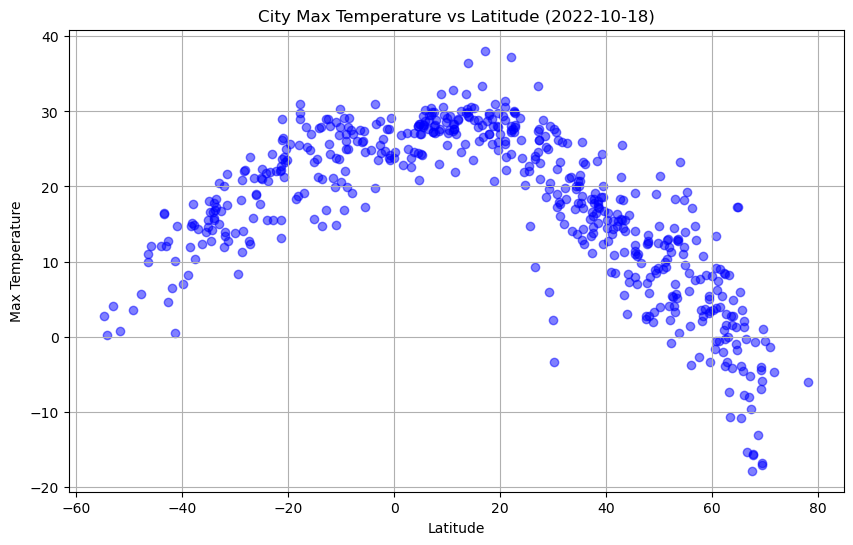

In [75]:
# Build scatter plot for latitude vs. temperature
plt.figure(figsize=(10, 6))
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], color="blue", alpha=0.5)

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Max Temperature")
plt.grid(True)
plt.title("City Max Temperature vs Latitude (2022-10-18)")

# Save the figure
plt.savefig("../output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

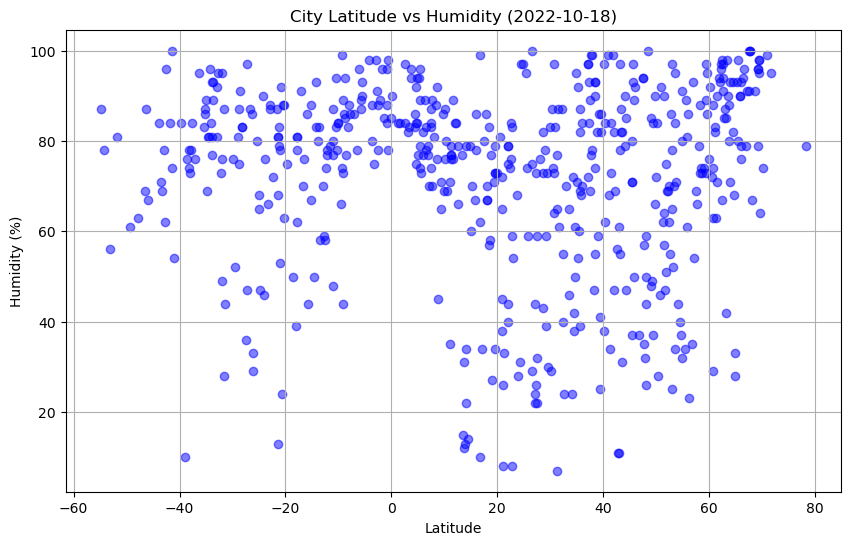

In [76]:
plt.figure(figsize=(10, 6))
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], color="blue", alpha=0.5)

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(True)
plt.title("City Latitude vs Humidity (2022-10-18)")

# Save the figure
plt.savefig("../output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

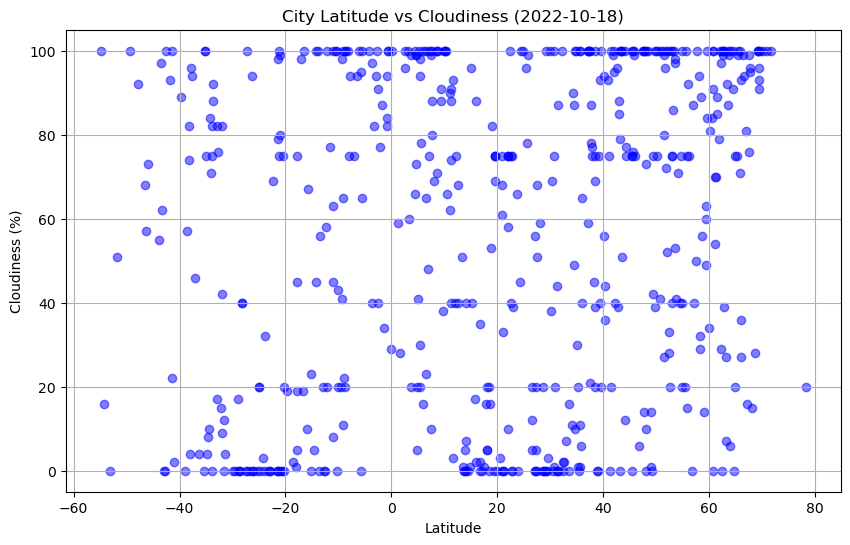

In [78]:
plt.figure(figsize=(10, 6))
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], color="blue", alpha=0.5)

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(True)
plt.title("City Latitude vs Cloudiness (2022-10-18)")

# Save the figure
plt.savefig("../output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

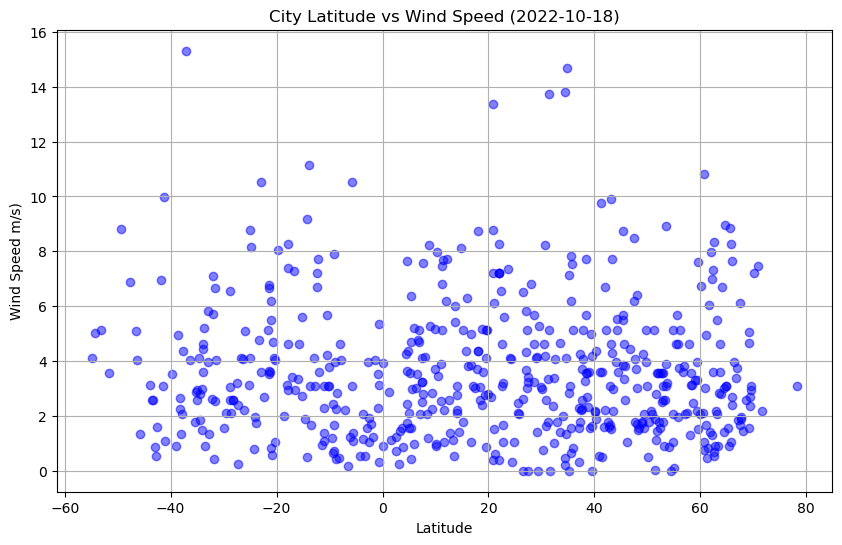

In [79]:
plt.figure(figsize=(10, 6))
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], color="blue", alpha=0.5)

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Wind Speed m/s)")
plt.grid(True)
plt.title("City Latitude vs Wind Speed (2022-10-18)")

# Save the figure
plt.savefig("../output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [82]:
# Define a function to create Linear Regression plots
def regression(x_values, y_values):

# Perform a linear regression on temperature vs. latitude
    (slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)

# Get regression values
    regress_values = x_values * slope + intercept

    return regress_values, slope, intercept, rvalue, pvalue, stderr

print(regression(city_data_df["Lat"], city_data_df["Max Temp"]))

(City_ID
0      21.536439
1      15.468957
2      25.712352
3      25.320211
4      26.320562
         ...    
544    11.008504
545    19.978176
546    21.369786
547    12.575877
548    13.743608
Name: Lat, Length: 549, dtype: float64, -0.15466631499193056, 19.97924314453396, -0.47748302047270696, 1.3062193372633603e-32, 0.012169019747174365)


In [83]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df["Lat"] > 0, :]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,waddan,29.1614,16.1390,19.62,39,0,4.14,LY,1714866956
5,jamestown,42.0970,-79.2353,14.75,82,100,6.69,US,1714866956
7,rikaze,29.2500,88.8833,5.99,59,100,1.42,CN,1714866957
11,wailua homesteads,22.0669,-159.3780,27.24,79,75,7.20,US,1714866802
12,vilyuchinsk,52.9306,158.4028,4.15,97,100,1.76,RU,1714866957


In [97]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df["Lat"] < 0, :]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,huarmey,-10.0681,-78.1522,20.63,84,43,3.77,PE,1714866817
2,edinburgh of the seven seas,-37.0676,-12.3116,14.31,76,46,15.31,SH,1714866775
3,bredasdorp,-34.5322,20.0403,12.71,81,8,1.86,ZA,1714866956
4,wynyard,-41.0000,145.7167,14.70,54,2,1.07,AU,1714866956
6,blackmans bay,-43.0167,147.3167,12.07,78,0,0.86,AU,1714866753


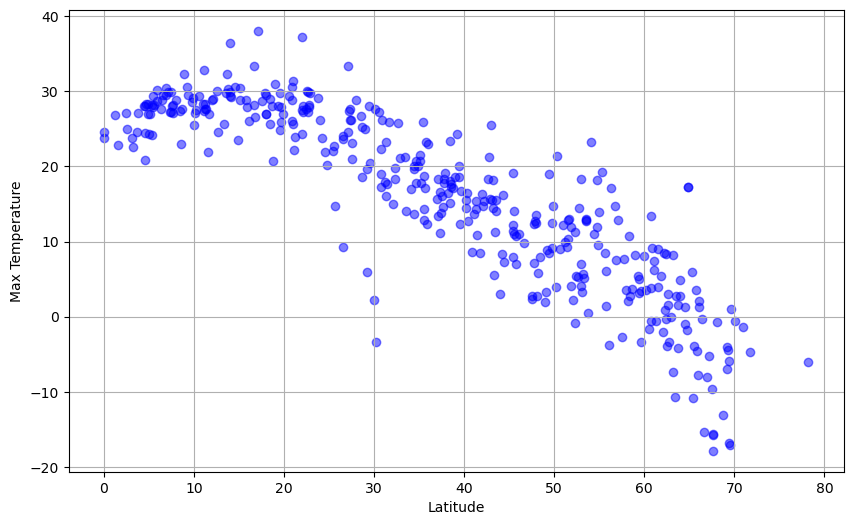

In [85]:
# Build scatter plot for latitude vs. temperature
plt.figure(figsize=(10, 6))
plt.scatter(northern_hemi_df["Lat"], northern_hemi_df["Max Temp"], color="blue", alpha=0.5)

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Max Temperature")
plt.grid(True)
#plt.title("City Max Temperature vs Latitude (2022-10-18)")


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: 0.7628649301047957


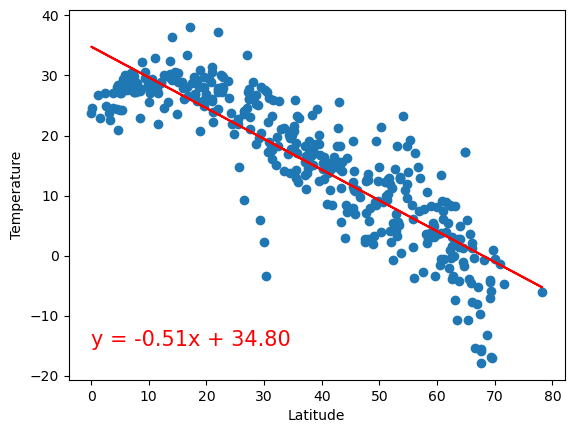

In [92]:
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]

regress_values, slope, intercept, rvalue, pvalue, stderr = regression(x_values, y_values)
line_eq = f"y = {slope:.2f}x + {intercept:.2f}"

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Temperature')
plt.annotate(line_eq,(0,-15),fontsize=15,color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")

# Show plot
plt.show()

The r-value is: 0.6559623242359537


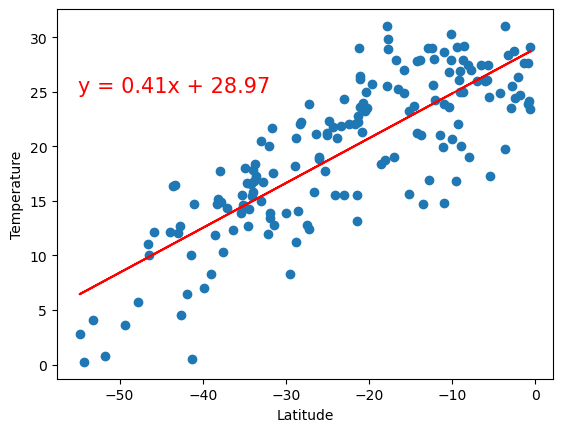

In [99]:
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]

regress_values, slope, intercept, rvalue, pvalue, stderr = regression(x_values, y_values)
line_eq = f"y = {slope:.2f}x + {intercept:.2f}"

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Temperature')
plt.annotate(line_eq,(-55,25),fontsize=15,color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")

# Show plot
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

As would be wholly predictable there is a strong correlation between latitude and temperature.  An r value in both hemispheres over .65 would indicate a strong relationship and one that one might expect was even causal.  In fact, the r-value in the northern hemisphere was slightly over .76.  I would expect that these values would remain consistent over numerous random samples.

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.012009798853944131


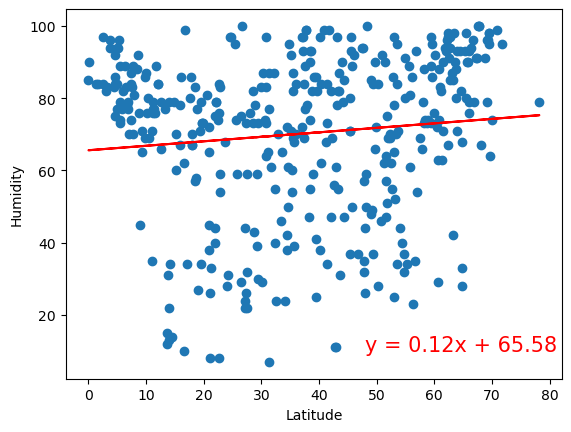

In [101]:
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]

regress_values, slope, intercept, rvalue, pvalue, stderr = regression(x_values, y_values)
line_eq = f"y = {slope:.2f}x + {intercept:.2f}"

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.annotate(line_eq,(48,10),fontsize=15,color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")

# Show plot
plt.show()

The r-value is: 0.026236370938072053


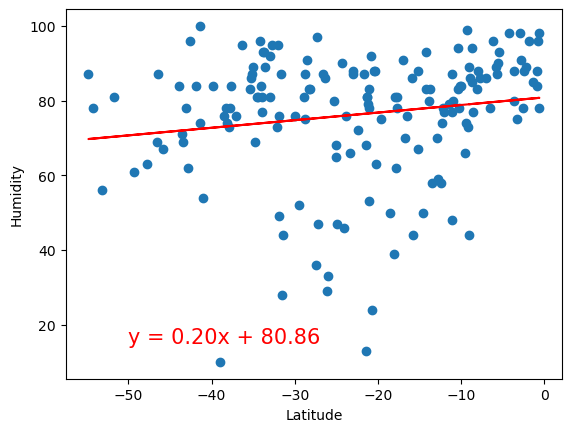

In [103]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]

regress_values, slope, intercept, rvalue, pvalue, stderr = regression(x_values, y_values)
line_eq = f"y = {slope:.2f}x + {intercept:.2f}"

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.annotate(line_eq,(-50,15),fontsize=15,color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")

# Show plot
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

There would appear to be very little, if not no relationship between latitude and humidity. R-values in both hemispheres did not surpass .03 which suggests no relationship whatsoever.  Even the potential outliers just by looking at the chart show that they were found overwhelmingly in the middle of the latitude range.  This would suggests that even extremes in latitude still show more median values in terms of humidity.

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.03149794415063391


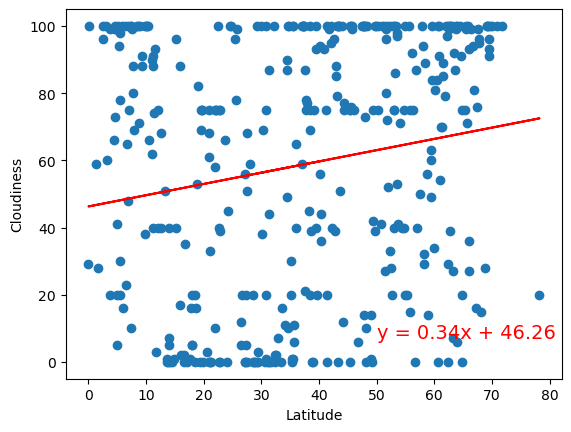

In [106]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]

regress_values, slope, intercept, rvalue, pvalue, stderr = regression(x_values, y_values)
line_eq = f"y = {slope:.2f}x + {intercept:.2f}"

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.annotate(line_eq,(50,7),fontsize=14,color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")

# Show plot
plt.show()

The r-value is: 0.024754317177145487


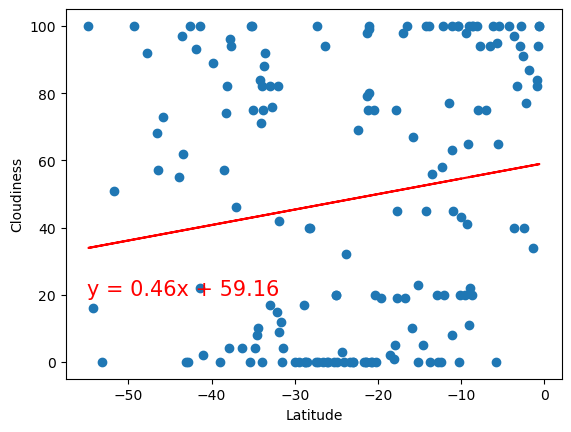

In [108]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]

regress_values, slope, intercept, rvalue, pvalue, stderr = regression(x_values, y_values)
line_eq = f"y = {slope:.2f}x + {intercept:.2f}"

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.annotate(line_eq,(-55,20),fontsize=15,color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")

# Show plot
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

The relationship between latitude and cloudiness was also extremely weak if not non-existent.  The r-values in each hemisphere were extremely low mirroring the values found in the relationship between humidity and latitude.  One mildly interesting aspect of this relationship has to do with the collection of 100 values found in lower latitudes and a pooling of 0 values found in median latitudes.  This could be evidenced by the modest negative correlation found overall as cloudiness falls, at least at first, as latitude increases.  I'd be interested to see if a more predictable relationship emerged between low latitudes and medium latitudes.  But, it seems unlikely that any kind of overarching relationship emerged.

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.0008552239431357356


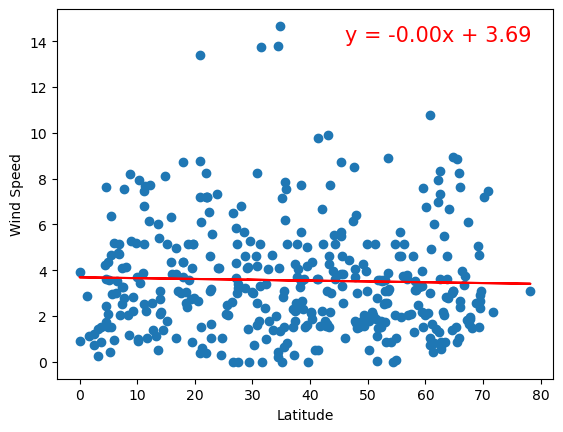

In [111]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]

regress_values, slope, intercept, rvalue, pvalue, stderr = regression(x_values, y_values)
line_eq = f"y = {slope:.2f}x + {intercept:.2f}"

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.annotate(line_eq,(46,14),fontsize=15,color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")

# Show plot
plt.show()

The r-value is: 0.019384723908954557


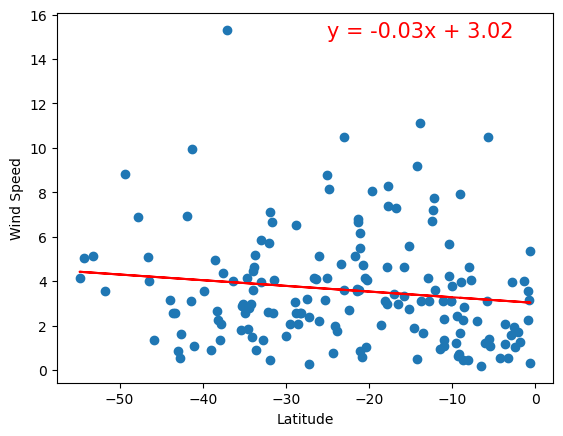

In [114]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]

regress_values, slope, intercept, rvalue, pvalue, stderr = regression(x_values, y_values)
line_eq = f"y = {slope:.2f}x + {intercept:.2f}"

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.annotate(line_eq,(-25,15),fontsize=15,color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")

# Show plot
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

Once again there would appear to be no relationship between latitude and wind speed with near zero r-values in both hemispheres.  Of some possible note would be the presence of all potential outliers in the median range in both hemispheres.  This might suggest that despite the strong collection of moderate wind speeds at all latitudes, that the means of wind speed by latitude categories might see a slight spike at middle latitudes versus lower and higher latitude locations. 